<a href="https://www.kaggle.com/code/fizcogar/intro-ia-1-3-1-sobreajuste?scriptVersionId=116155231" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# Sobreajuste

## La ecuación del vino que toca las narices: ¿Podemos hacerlo mejor? 
### Regresión con árboles de decisión

Ahora hay muchos más modelos de ML a nuestra disposición que cuando el Profesor publicó su método. ¿Seríamos capaces de encontrar, con un modelo más moderno, un **mejor resultado** al problema de la predicción del precio del vino a partir de la meteorología?

Los **árboles de decisión** (y su evolución, los bosques aleatorios) son un modelo de aprendizaje máquina **muy utilizado** hoy en día. Vamos a expermientar con ellos. 

# Línea base 
Nuestra nueva 'línea base' es el error cometido por el modelo del profe, que era un **rmse de 0.2855**

# Sklearn

![sklearn-logo.png](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png)
https://scikit-learn.org/stable/modules/tree.html

Otra vez vamos a usar [sklearn](https://scikit-learn.org), que implementa varios modelos basados en árboles de decisión.

In [1]:
import pandas as pd
from sklearn import tree, linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


El 'dataset' de entrenamiento es el mismo:

In [2]:
data = pd.read_csv('/kaggle/input/meteo-vinos/meteo.vinos.csv')
variables = ['LluviaInvierno', 'TemperaturaMediaVerano', 'LluviaCosecha', 'Edad']
X = data[variables].values
Y = data['Precio'].values
data

,Año,LluviaInvierno,TemperaturaMediaVerano,LluviaCosecha,Edad,Precio
0,1952,600,17.1167,160,31,7.4950
1,1953,690,16.7333,80,30,8.0393
2,1955,502,17.1500,130,28,7.6858
3,1957,420,16.1333,110,26,6.9845
4,1958,582,16.4167,187,25,6.7772
5,1959,485,17.4833,187,24,8.0757
6,1960,763,16.4167,290,23,6.5188
7,1961,830,17.3333,38,22,8.4937
8,1962,697,16.3000,52,21,7.3880
9,1963,608,15.7167,155,20,6.7127


# Primer intento

La **profundidad máxima** de un árbol de decisión es un hyperparámetro del modelo. Empezamos experimentando con **un único nivel**:

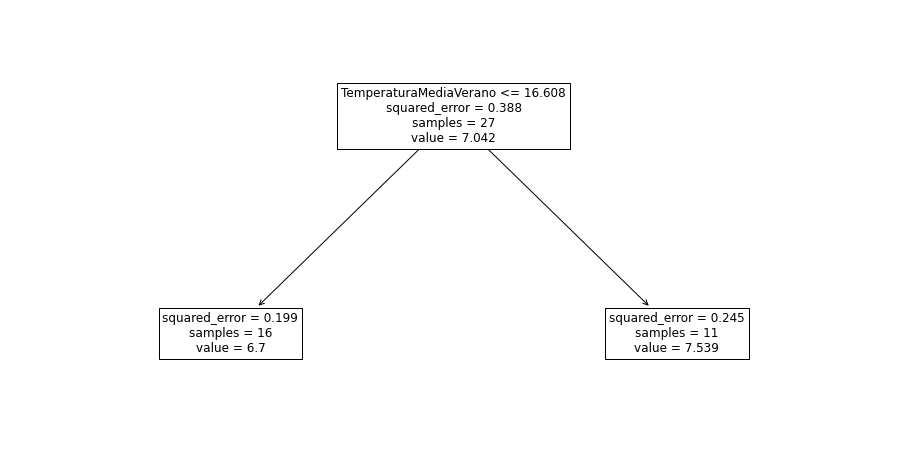

In [3]:
# Modelo para regresión con un árbol binario de profundidad máxima 1
decision_tree_regressor = tree.DecisionTreeRegressor(max_depth=1)
# Entrenamiento:
decision_tree_regressor.fit(X, Y)
# Interpretación:
plt.figure(figsize=(16, 8))
tree.plot_tree(decision_tree_regressor, feature_names=variables, fontsize=12)
plt.show()

## Los árboles de decisión son **interpretables**

Es una gran ventaja poder interpretar **por qué un modelo hace una predicción** durante la inferencia, es decir, **qué variables de entrada** son las que han participado más en la predicción.

>Un ejemplo real: hace unos años en IBM nos contaban que habían construido un sistema de ML para la **detección de fraude fiscal** para la 
>Agencia Tributaria. El **rendimiento** (el error cometido) por un modelo basado en **redes neuronales** era ligeramente mejor al basado en **árboles de decisión**, pero se decidieron por éste último porque los inspectores de Hacienda necesitaban **fundamentar** una inspección.

Pocos modelos de ML son interpretables, la mayoría son una **caja negra**.

**sklearn** también proporciona una representación en **modo 'texto'**:

In [4]:
text_representation = tree.export_text(decision_tree_regressor, feature_names=variables)
print(text_representation)

|--- TemperaturaMediaVerano <= 16.61
|   |--- value: [6.70]
|--- TemperaturaMediaVerano >  16.61
|   |--- value: [7.54]



### Interpretación

* Si la temperatura media en verano de una cosecha  es menor o igual a 16.61, el precio futuro será 6.70
* Si no, será 7.54

### Por cierto ... ¿A qué os suena esto?

¡Al segundo modelo del capítulo anterior! 

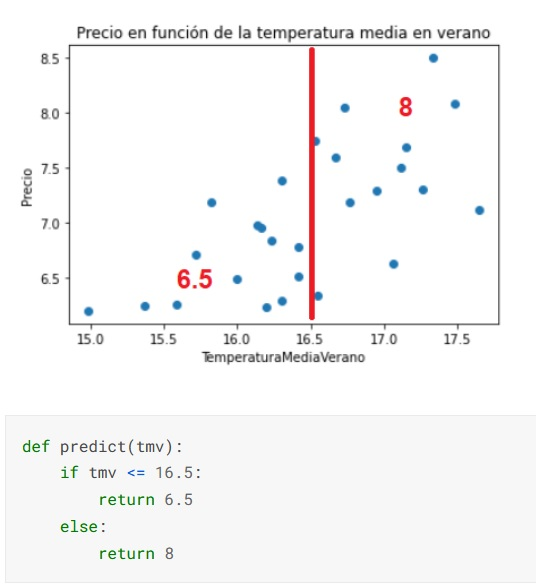


### La gran diferencia ...

... es que la temperatura 'de corte' y los precios devueltos por el modelo yo los calculé 'a ojo', y este modelo, mediante un método de **optimización** ha **'aprendido'** los valores óptimos que **minimizan el error medio**.

También **'aprende'** que la variable más significativa es la **temperatura media en verano**, de la misma manera: se comete **menos error** medio con esta variable que con las otras.

Es decir, los **parámetros** que aprende este modelo con el entrenamiento son
* Qué **variables** que intervienen en las decisiones
* Cuáles son los **valores 'de corte'** en las decisiones
* Qué valores se devuelven como **resultado** al finalizar cada 'cadena' de decisiones

## Evaluación

In [5]:
error_0 = mean_squared_error(Y, decision_tree_regressor.predict(X), squared=False)
print('Error línea base: {}'.format(error_0))

Error línea base: 0.46674225258178403


Este modelo **no es mejor** que el del Profe, el error medio es el doble ...

# Segundo intento: probemos con un árbol más profundo ...

La profundida del árbol es un **hiperparámetro**, como el ratio de aprendizaje. Jugar con los hiperparámetros forma parte de la experimentación inherente a los proyectos de ciencia de datos ...

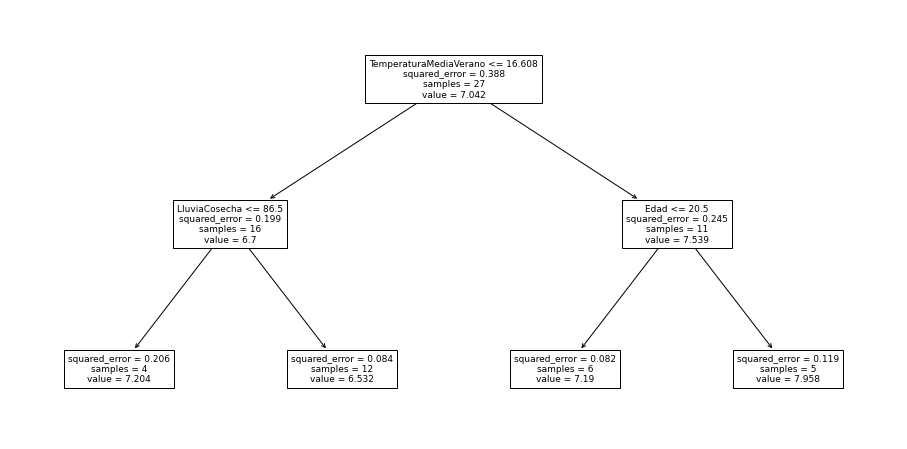

In [6]:
decision_tree_regressor = tree.DecisionTreeRegressor(max_depth=2)
decision_tree_regressor.fit(X, Y)
plt.figure(figsize=(16, 8))
tree.plot_tree(decision_tree_regressor, feature_names=variables, fontsize=9)
plt.show()

## Evaluación

In [7]:
error_1 = mean_squared_error(Y, decision_tree_regressor.predict(X), squared=False)
print('Error: {}'.format(error_1))

Error: 0.32886220640637487


El error se ha reducido, pero todavía no hemos mejorado la línea base.

# Tercer intento: más profundidad

In [8]:
decision_tree_regressor = tree.DecisionTreeRegressor(max_depth=3)
decision_tree_regressor.fit(X, Y)
error_2 = mean_squared_error(Y, decision_tree_regressor.predict(X), squared=False)
print('Error: {}'.format(error_2))

Error: 0.2038698550606958


¡Por fin! Este modelo **mejora la línea base**. Pero ¿Por qué para aquí? ¡Mas madera!

# Ultimo intento: sin límite de profundidad

In [9]:
decision_tree_regressor = tree.DecisionTreeRegressor(max_depth=None)
decision_tree_regressor.fit(X, Y)
error_3 = mean_squared_error(Y, decision_tree_regressor.predict(X), squared=False)
print('Error: {}'.format(error_3))

Error: 0.0


¡Error cero! ¡El modelo **perfecto**! ¡Aparta Princeton, que vienen los de Pamplona!

# ¿Demasiado bonito para ser cierto?

Estamos validando el modelo con **los mismos datos con los que hemos entrenado el modelo**. 

¿Cómo podemos estar seguros de que lo único que ha hecho el modelo es, de alguna forma, **memorizar** los datos de entrenamiento? De ser así la validación no serviría de nada, porque el modelo no podría **generalizar**.

## Separación de datos para entrenamiento y validación

Para evitar este problema deberíamos **entrenar el modelo con unos datos y validarlo con otros**.

Como no tenemos más datos, **separamos** una parte para la validación. Esos datos no los ve el modelo durante el entrenamiento.

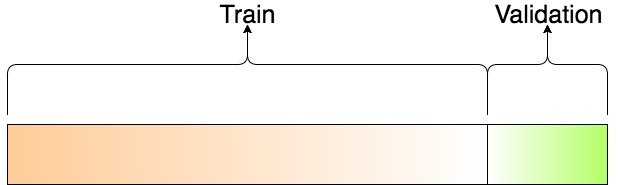

Vamos a separar el **30% de los datos** para la validación:

In [10]:
from sklearn.model_selection import train_test_split
# Separación para validación:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.3, random_state=666)
print("Entrenamiento: {} cosechas, Validación: {} cosechas".format(len(X_train), len(X_valid)))

Entrenamiento: 18 cosechas, Validación: 9 cosechas


In [11]:
# Instancia del modelo:
decision_tree_regressor = tree.DecisionTreeRegressor(max_depth=None)
# Entrenamiento:
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

### Evaluación sobre el conjunto de datos de entrenamiento:

In [12]:
print("Error sobre el conjunto de entrenamiento:", mean_squared_error(Y_train, decision_tree_regressor.predict(X_train), squared=False))

Error sobre el conjunto de entrenamiento: 0.0


### Evaluación sobre el conjunto de datos de validación:

In [13]:
print("Error sobre el conjunto de validación:", mean_squared_error(Y_valid, decision_tree_regressor.predict(X_valid), squared=False))


Error sobre el conjunto de validación: 0.5586535400208057


El nuevo modelo **NO GENERALIZA BIEN**. Este modelo sufre de **sobreajuste** (overfitting), es decir, se ajusta demasiado a los datos de entrenamiento

Si vemos la representación gráfica del árbol de decisión, vemos que, efectivamente, **practicamente a memorizado** los datos de entrenamiento, preacticamente hay una cadena de decisiones para **cada precio** del conjunto de datos de **entrenamiento**.

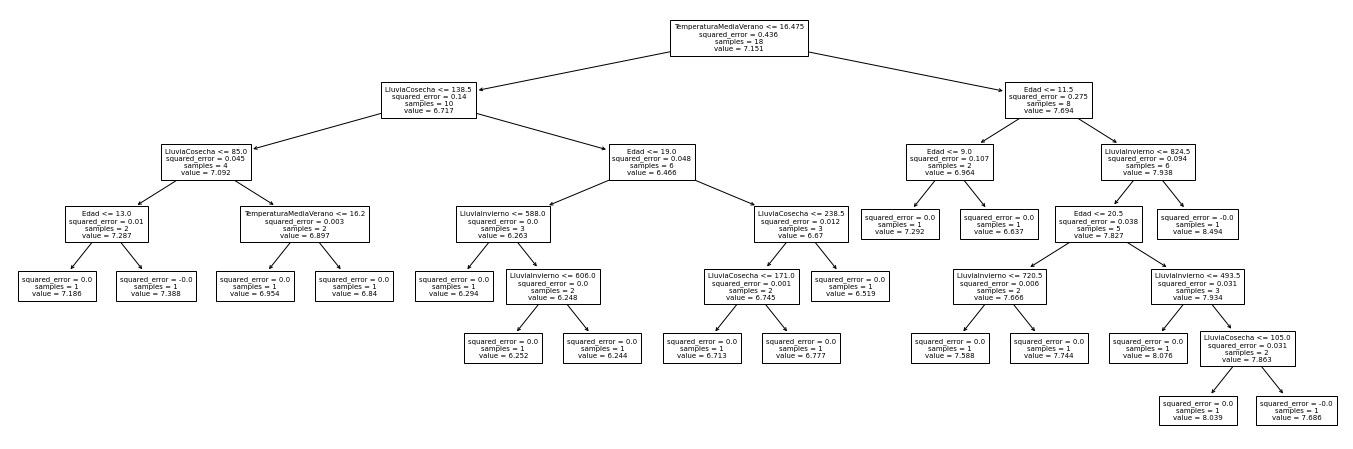

In [14]:
plt.figure(figsize=(24, 8))
tree.plot_tree(decision_tree_regressor, feature_names=variables, fontsize=7)
plt.show()

# ¿Y el modelo de regresión lineal del Profesor?

¿Sufrirá de este mismo problema?

In [15]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, Y_train)
mean_squared_error(Y_train, linear_regressor.predict(X_train), squared=False)

0.2539109326884817

In [16]:
mean_squared_error(Y_valid, linear_regressor.predict(X_valid), squared=False)

0.28559893114255797

**¡Generaliza mucho mejor!**

Princeton 1, Pamplona 0

-----

# Un símil deportivo para entender el sobreajuste

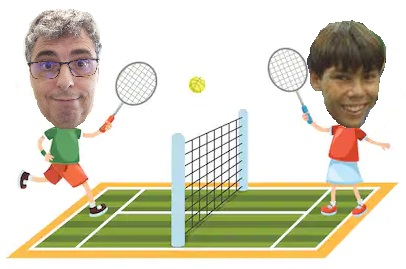

Hace unos años (**1998**, el siglo pasado), durante unas vacaciones en **Mallorca** mi buen amigo Sebastián me dice:
- Tu tienes el título de técnico deportivo ¿verdad?
- Pues sí ...
- Te quería pedir un favor. Creo que mi hijo **rafa** tiene talento para el deporte. Le he apuntado a un campeonato de tenis juvenil en el pueblo, y me gustaría que entrenara un poco contigo, para que no haga el ridículo.
- Buenos, el tenis no es lo mío, pero encantado.

## Underfitting (falta de ajuste)

Hablé con el chaval y le propuse un plan de entrenamiento. Pero se había echado una novieta, y **no prestaba atención**. Yo le ganaba con demasiada facilidad, y en el primer partido del **campeonato**, le dieron una **paliza**.

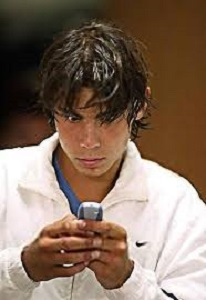  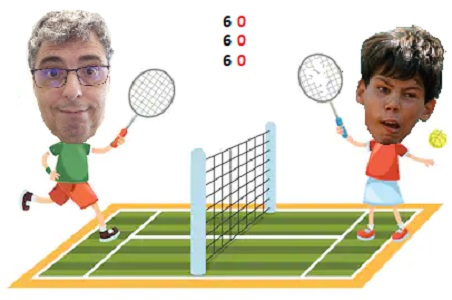  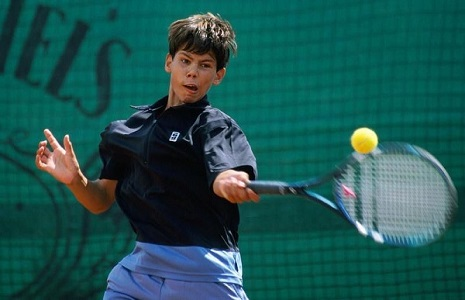  

Esto es **underfitting**, falta de ajuste, el modelo es **incapaz de detectar patrones** en los datos. Esto ocurre
* Si no tenemos suficientes **datos** de entrenamiento **representativos**
* Si el modelo no es **apropiado**:
    * No se adapta bien a este tipo de problemas
    * O símplemente no es lo bastante **complejo** como para poder encontrar los patrones en los datos de entrenamiento
    
Si vemos la **evolución del error durante el entrenamiento** del modelo, vemos que no aprende casi nada ...

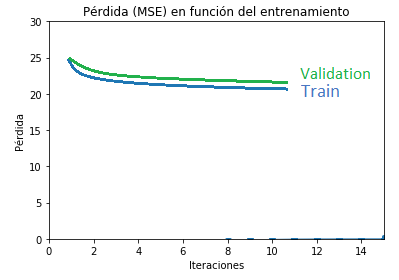

## Overfitting (sobreajuste)

En este caso esta claro que **faltan datos de entrenamiento**. Me pongo serio y por fin Rafa empieza a entrenar. Parece que **tiene talento**, enseguida se ha dado cuenta de que:

* Soy materialmente incapaz de **subir a la red**
* Si me hace correr un poco por la pista, **me desfondo**

¡Pero en el siguiente partido del campeonato, vuelve a perder!

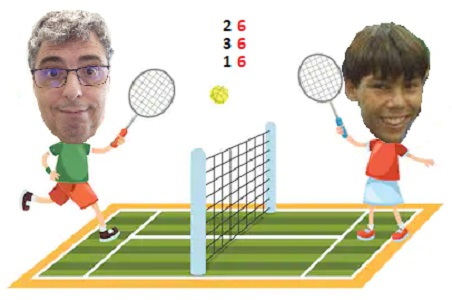 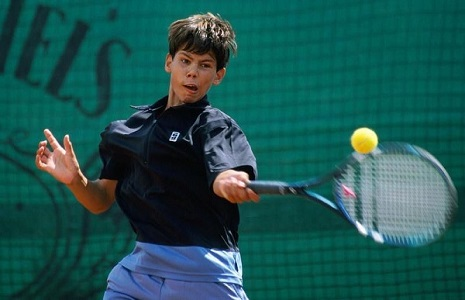

Esto es **overfitting (sobreajuste)**, y ocurre cuando un modelo encuentra **patrones demasiado ajustados a los datos de entrenamiento**, pero no generaliza bien. Puede pasar:
* Si no tenemos suficientes datos de entrenamiento **representativos**
* Y el modelo es lo bastante **complejo** como para encontrar patrones en esos datos de entrenamiento.

En la gráfica de error vemos que conforme el modelo se entrena, el error se reduce mucho con el conjunto de datos de entrenamiento, pero muy poco con los datos de validación ...

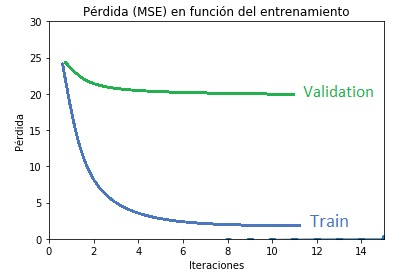

Eso le ha pasado a Rafa. Los **patrones** que ha aprendido jugando contra mí (dejadas a la red, hacerme correr) **no le sirven** de casi nada contra jugadores más jovenes. **Yo no soy un jugador representativo** de lo que se va a encontrar en los campeonatos. Le faltan datos representativos: tiene que jugar **mucho, con otros jugadores**, a ser posible más jóvenes que yo ...

## Modelo bien ajustado

Nuevo plan de entrenamiento: tiene que jugar mucho y con muchos jugadores ... Pronto me daba palizas monumentales ...

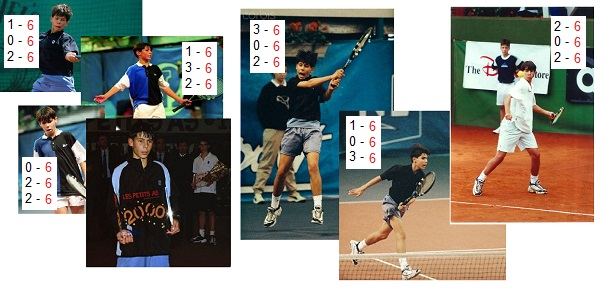 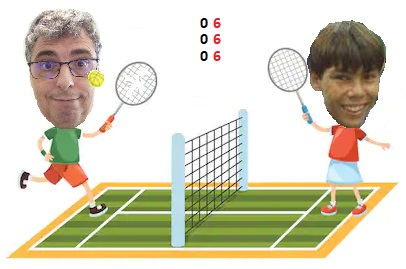

... y al final, ganó el campeonato. **El resto, es historia.**

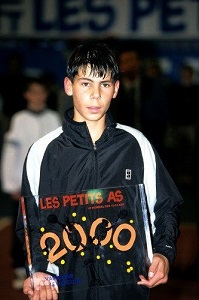

Esto es un modelo bien ajustado. La curva de pérdida es similar para los dos conjuntos de datos.

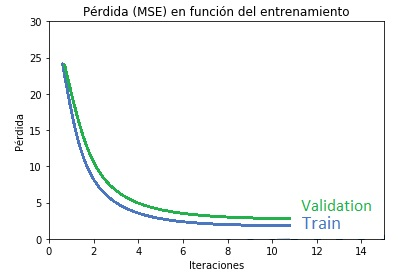

# Claves ...

¿Qué hemos aprendido?

## Los árboles de decisión son un modelo **interpretable**

```
|--- TemperaturaMediaVerano <= 16.61
|   |--- value: [6.70]
|--- TemperaturaMediaVerano >  16.61
|   |--- value: [7.54]
```



## No siempre un modelo más complejo es mejor
Sobre todo si tenemos pocos datos, porque corremos el riesgo de **sobreajuste**. 

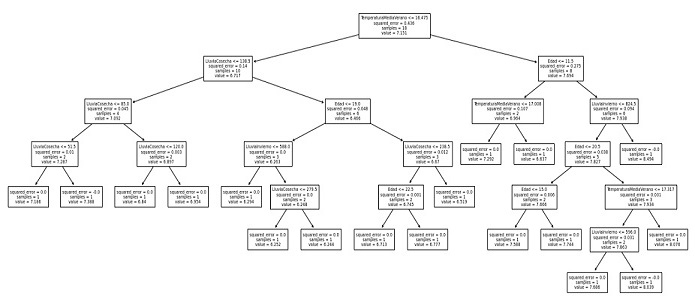  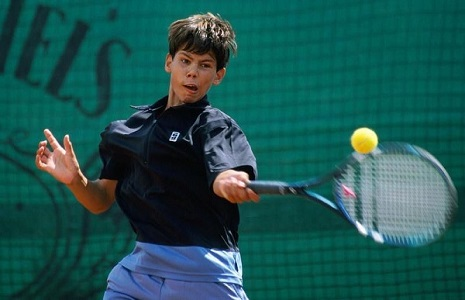

## Separar datos para la **evaluación** del modelo

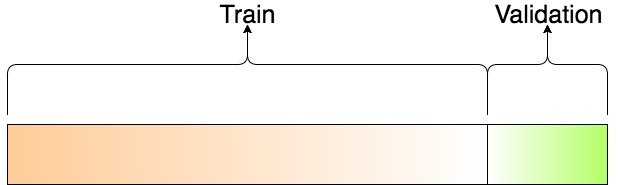  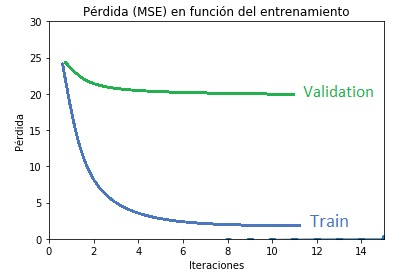

Puede **ayudar** a detectar el **sobreajuste**, aunque como veremos más adelante, **tampoco es una garantía**.

## Incluso separar un tercer subconjunto de datos para una última **prueba**

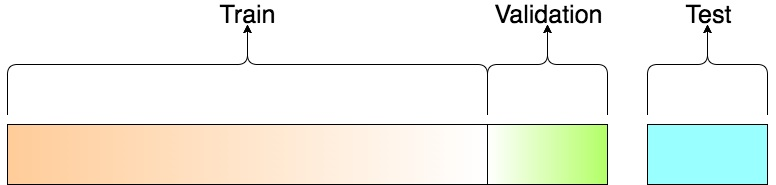

Muy interesante para los que tenemos que **contratar** la creación de un modelo. **Guardarnos** una parte de los datos como conjunto de datos de **prueba**, para validar el modelo que nos entrega el **contratante**.